# **BDTs at work: the $\Omega$ analysis**

The goal of this tutorial is to provide an example of binary classification with machine learning techniques applied to an ALICE analysis. This tutorial is based on the measurement of the invariant mass of the $\mathrm{\Omega}$ , through its cascade decay channel $\mathrm{\Omega^-} \rightarrow \mathrm{\Lambda} + K^- \rightarrow p + \pi^- + K^-$. We will need two samples: 
- Real data: Pb--Pb collisions at $s_{\sqrt{NN}} = 5.02$ TeV (LHC18qr, subsample)
- Anchored MC production: LHC21l5

At the end of the tutorial we will be able to see the peak of the $\mathrm{\Omega}$ !


<img src="img/omega_dec.png" 
     align="center" 
     width="500" />

#### First, we need some libraries ###

In [2]:
### standard sci-py libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import uproot ### to read, convert, inspect ROOT TTrees
import uproot

One tip before starting: to access the documentation associated to each function we are going to call just type Shift+Tab after the first parenthesis of the function

## Reading trees with uproot, handling them with pandas

Uproot (https://github.com/scikit-hep/uproot4) is a Python package that provides tools for reading/writing ROOT files using Python and Numpy (does not depend on ROOT) and is primarly intended to stream data into machine learning libraries in Python.

In [3]:
## first we have to download the trees

#!curl -L https://cernbox.cern.ch/s/V05rgkoJfGe8x7K/download --output AnalysisResults-mc_reduced.root
#!curl -L https://cernbox.cern.ch/s/ReP4m9tDJ6UfivD/download --output AnalysisResults_reduced.root

In [4]:
# Rest of your code remains unchanged
#mc_file = uproot.open("/home/oem/repos/data/AnalysisResults_reduced.root")
mc_file = uproot.open("/home/dragon/github/data/AnalysisResults_reduced.root")

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc = mc_file["XiOmegaTree"].arrays(library="np")


In [4]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResults_reduced = pd.DataFrame(numpy_mc)


# Write the DataFrame to a CSV file
#df.to_csv("AnalysisResults-mc_reduced.csv", index=False)

In [5]:
AnalysisResults_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'index'],
      dtype='object')

# file  2


In [6]:
#mc_file2 = uproot.open("/home/oem/repos/data/AnalysisResults-mc_reduced.root")
mc_file2 = uproot.open("/home/dragon/github/data/AnalysisResults-mc_reduced.root")

mc_file2.keys()

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc2 = mc_file2["XiOmegaTree"].arrays(library="np")

# Print the data
print(numpy_mc2)


{'pt': array([3.43627572, 3.1503036 , 3.1503036 , ..., 0.98587209, 3.5488987 ,
       3.5488987 ]), 'eta': array([ 0.4304224 , -0.44923487, -0.44923487, ..., -0.21326731,
       -0.68127084, -0.68127084]), 'mass': array([1.35017145, 1.30052471, 1.30052471, ..., 1.29829669, 1.32010543,
       1.32010543]), 'ct': array([12.46815395,  0.97671664,  0.97671664, ...,  3.49920106,
       12.49555588, 12.49555588]), 'radius': array([25.4       ,  2.1828125 ,  2.1828125 , ...,  2.48046875,
        7.04453125,  7.04453125]), 'radiusV0': array([25.4      , 25.4      , 25.4      , ...,  4.365625 ,  7.7390625,
        7.7390625]), 'dcaBachPV': array([2.54      , 0.2778125 , 0.2778125 , ..., 0.62507813, 2.54      ,
       2.54      ]), 'dcaV0PV': array([0.46632812, 0.3175    , 0.3175    , ..., 0.873125  , 0.52585938,
       0.52585938]), 'dcaV0piPV': array([2.54, 2.54, 2.54, ..., 2.54, 2.54, 2.54]), 'dcaV0prPV': array([1.27992188, 2.19273438, 2.19273438, ..., 0.22820313, 0.29765625,
       0.2976562

In [7]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResultsmc_reduced = pd.DataFrame(numpy_mc2)
# Write the DataFrame to a CSV file
#AnalysisResults_mc_reduced.to_csv("AnalysisResults-mc_reduced.csv", index=False)

In [8]:
AnalysisResultsmc_reduced =  AnalysisResultsmc_reduced.iloc[:10, :] # comment this line to run code with wholee data 
AnalysisResults_reduced =  AnalysisResults_reduced.iloc[:10, :] # cpomment this line to run whole code with whole data


The dataset under consideration presents a multifaceted view into particle physics experiments or simulations, offering a rich array of columns that encapsulate diverse measurements and parameters essential for understanding particle interactions and experimental conditions. Each column serves as a valuable piece of information contributing to the holistic understanding of the phenomena observed in the data. In this extensive explanation, we will delve into each column individually, elucidating its significance, relevance, and potential implications for machine learning (ML) model visualization and analysis.

1. **Transverse Momentum (pt):**
The 'pt' column, representing transverse momentum, stands as a fundamental parameter in particle physics experiments. Transverse momentum refers to the momentum component perpendicular to the beam axis and is pivotal for determining particle trajectories and interactions within the detector. A distribution of transverse momentum values provides insights into the energy imparted to particles during collisions, enabling the identification of high-energy events and rare particle decays. In the context of ML model visualization and analysis, visualizing the 'pt' distribution can reveal patterns, anomalies, and correlations that are crucial for understanding the underlying physics processes.

2. **Pseudorapidity (eta):**
Pseudorapidity, represented by the 'eta' column, characterizes the angular distribution of particles relative to the beam axis. It plays a crucial role in particle identification and event classification, as particles with different pseudorapidities exhibit distinct behaviors in the detector. By analyzing the distribution of pseudorapidity values, researchers can gain insights into the forward-backward asymmetry of particle production and the kinematic properties of particle jets. ML models trained on pseudorapidity data can learn to classify events based on their angular signatures, aiding in the identification of specific particle types and interactions.

3. **Mass:**
The 'mass' column provides information about the invariant mass of particles or particle systems reconstructed from detector measurements. Invariant mass is a key observable in particle physics, often used to identify resonances, particles, and particle decays. By examining the mass distribution of reconstructed particles, researchers can identify peaks corresponding to known particles or search for new physics phenomena. ML models trained on mass spectra data can automate the process of particle identification, enabling high-throughput analysis of experimental data and the discovery of rare or unexpected events.

4. **Spatial and Temporal Parameters (ct, radius):**
Parameters such as 'ct' (decay length) and 'radius' (interaction radius or vertex position) provide spatial and temporal information about particle decays and interactions within the detector. Decay length is particularly relevant for identifying long-lived particles or particles with displaced vertices, while interaction radius helps characterize the spatial distribution of particle interactions. ML models incorporating spatial and temporal parameters can learn to distinguish between different decay topologies, reconstruct particle trajectories, and identify secondary vertices associated with particle decays.

5. **Distance of Closest Approach (dcaBachPV, dcaV0PV):**
The 'dcaBachPV' and 'dcaV0PV' columns represent the distance of closest approach of particles to primary vertices (PVs), which are points of particle production or interaction within the detector. These parameters serve as indicators of particle track quality and provide information about the proximity of particles to primary interaction points. ML models trained on distance of closest approach data can classify particles based on their track quality, identify poorly reconstructed tracks, and improve the overall efficiency of particle reconstruction algorithms.

6. **Cosine of Pointing Angle (cosPA):**
The 'cosPA' column quantifies the alignment of decay products or secondary particles with the direction of their parent particle's momentum. A high cosine of pointing angle value indicates good alignment between the decay products, suggesting a well-reconstructed decay topology. ML models analyzing cosine of pointing angle data can learn to identify well-reconstructed decays, discriminate between signal and background events, and improve the overall signal-to-background ratio in particle physics analyses.

7. **Monte Carlo-Simulated Parameters (ptMC, etaMC, ctMC, yMC):**
The 'ptMC,' 'etaMC,' 'ctMC,' and 'yMC' columns provide Monte Carlo-simulated values for particle properties, offering a comparison between simulated and experimental data. Simulated data allows researchers to validate particle physics models, calibrate detector responses, and optimize analysis strategies. ML models trained on Monte Carlo-simulated data can learn to identify discrepancies between simulated and experimental distributions, quantify systematic uncertainties, and improve the overall accuracy of physics measurements.

8. **Particle Identification and Quality Assurance (hasTOFhit, hasITSrefit):**
Columns such as 'hasTOFhit' and 'hasITSrefit' indicate whether particles have interacted with specific detector subsystems, providing quality assurance metrics for particle reconstruction algorithms. The presence of hits in the Time-Of-Flight (TOF) detector or successful refits in the Inner Tracking System (ITS) indicates good track quality and reliable particle identification. ML models analyzing detector hit patterns can learn to identify poorly reconstructed tracks, optimize track reconstruction algorithms, and improve the overall efficiency of particle identification techniques.

By examining each column individually and elucidating its significance within the context of particle physics experiments,

 we gain a comprehensive understanding of the dataset's suitability for ML model visualization and analysis. The diverse range of parameters captured in the dataset offers valuable insights into particle properties, interactions, and experimental conditions, laying the groundwork for insightful analyses, advanced modeling techniques, and innovative discoveries in the field of particle physics.

# DATA CLEANING

## mising values in both real and simulated data 

In [9]:
# Check for missing values
simulated_missing = AnalysisResultsmc_reduced.isnull().sum()
real_world_missing = AnalysisResults_reduced.isnull().sum()

## duplicates

In [10]:
# Check for duplicates
simulated_duplicates = AnalysisResultsmc_reduced.duplicated().sum()
real_world_duplicates = AnalysisResults_reduced.duplicated().sum()

## converting strings to intergers

In [11]:
# Function to convert boolean columns to integers
def convert_boolean_to_integers(df):
    for column in df.select_dtypes(include=['bool']):
        df[column] = df[column].astype(int)
    return df

# Convert boolean columns to integers for both datasets
AnalysisResultsmc_reduced = convert_boolean_to_integers(AnalysisResultsmc_reduced)
AnalysisResults_reduced = convert_boolean_to_integers(AnalysisResults_reduced)

# Display the first few rows of both datasets to verify the conversion
#print("Simulated Data (AnalysisResultsmc_reduced) after conversion:")
#print(AnalysisResultsmc_reduced.head())

#print("\nReal-world Data (AnalysisResults_reduced) after conversion:")
#print(AnalysisResults_reduced.head())


In [12]:
pd.set_option('display.max_columns', None)

# EXPLORATORY DATA ANALYSIS 


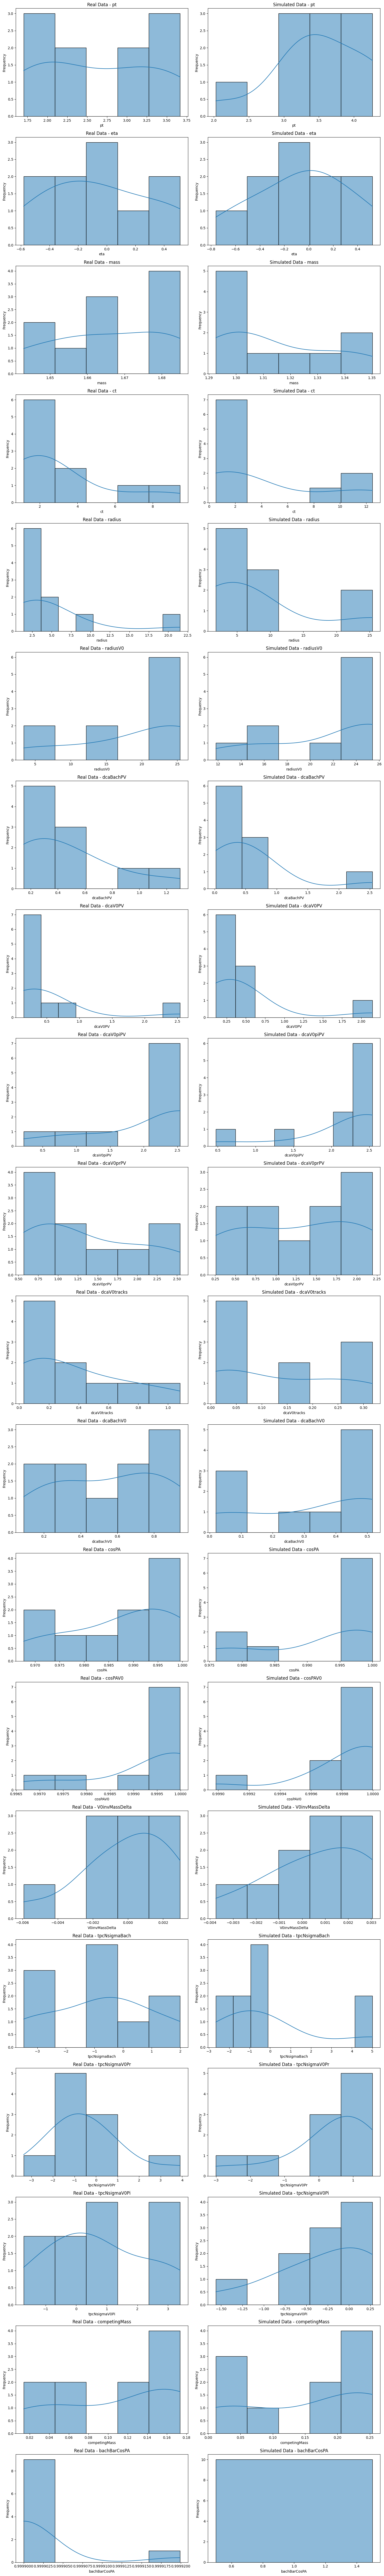

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define relevant columns for visualization
relevant_columns = ['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
                    'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
                    'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
                    'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA']

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=len(relevant_columns), ncols=2, figsize=(15, 5*len(relevant_columns)))

# Plot each column for real-world and simulated data
for i, column in enumerate(relevant_columns):
    # Bar plot for real-world data
    sns.histplot(data=AnalysisResults_reduced, x=column, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Real Data - {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Bar plot for simulated data
    sns.histplot(data=AnalysisResultsmc_reduced, x=column, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Simulated Data - {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [14]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Define relevant columns for visualization
#relevant_columns = ['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
   #                 'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
  #                  'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
 #                   'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA']

# Create subplots for side-by-side comparison
#fig, axes = plt.subplots(nrows=len(relevant_columns), ncols=2, figsize=(15, 5*len(relevant_columns)))

# Plot each column for real-world and simulated data
#for i, column in enumerate(relevant_columns):
    # Pie chart for real-world data
  #  real_data_counts = AnalysisResults_reduced[column].value_counts()
 #   axes[i, 0].pie(real_data_counts, labels=real_data_counts.index, autopct='%1.1f%%')
#    axes[i, 0].set_title(f'Real Data - {column}')

    # Pie chart for simulated data
   # simulated_data_counts = AnalysisResultsmc_reduced[column].value_counts()
  #  axes[i, 1].pie(simulated_data_counts, labels=simulated_data_counts.index, autopct='%1.1f%%')
 #   axes[i, 1].set_title(f'Simulated Data - {column}')

# Adjust layout and display the plots
#plt.tight_layout()
#plt.show()


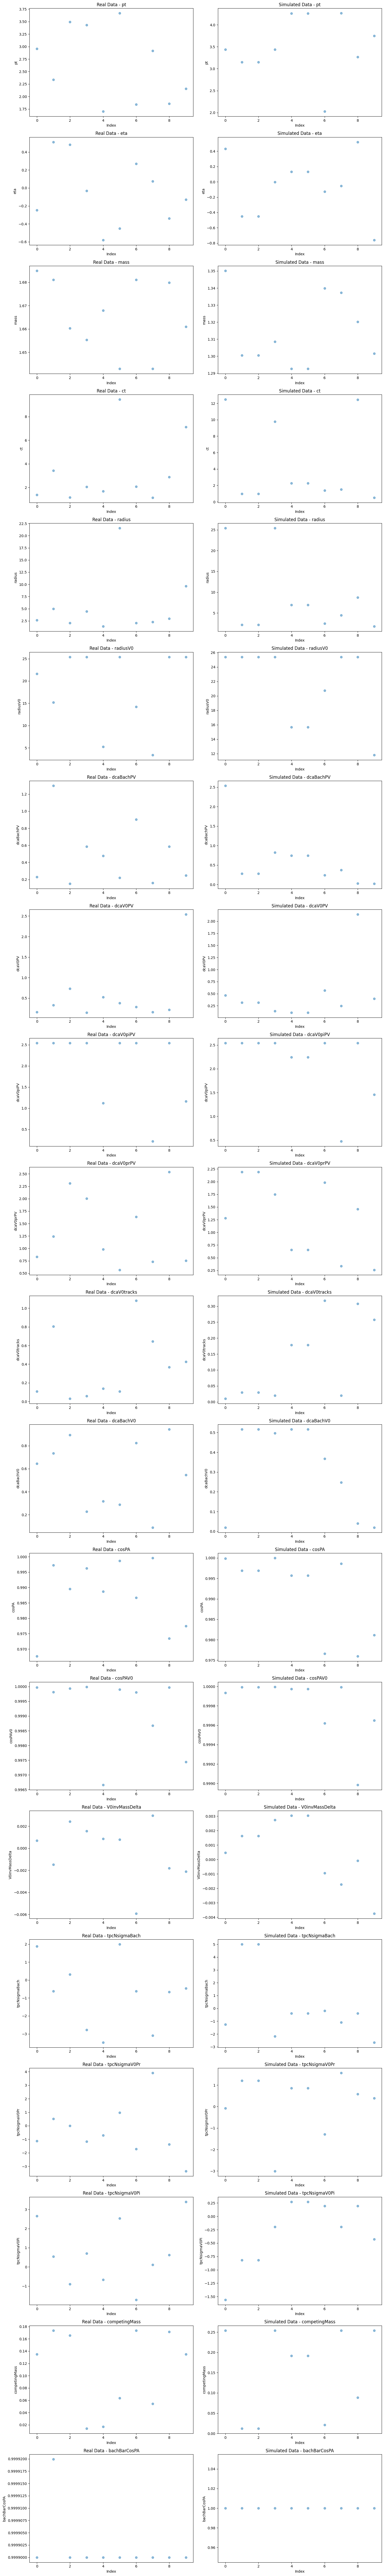

In [15]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=len(relevant_columns), ncols=2, figsize=(15, 5*len(relevant_columns)))

# Plot each column for real-world and simulated data
for i, column in enumerate(relevant_columns):
    # Scatter plot for real-world data
    axes[i, 0].scatter(range(len(AnalysisResults_reduced)), AnalysisResults_reduced[column], label='Real Data', alpha=0.5)
    axes[i, 0].set_title(f'Real Data - {column}')
    axes[i, 0].set_xlabel('Index')
    axes[i, 0].set_ylabel(column)

    # Scatter plot for simulated data
    axes[i, 1].scatter(range(len(AnalysisResultsmc_reduced)), AnalysisResultsmc_reduced[column], label='Simulated Data', alpha=0.5)
    axes[i, 1].set_title(f'Simulated Data - {column}')
    axes[i, 1].set_xlabel('Index')
    axes[i, 1].set_ylabel(column)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# MODELS FOR BOTH SIMULATED AND REAL WORLD DATA 


## 1. Linear Regression

Mean Squared Error (Real-world data): 0.10201711458539951
Mean Squared Error (Simulated data): 0.22879090819482414


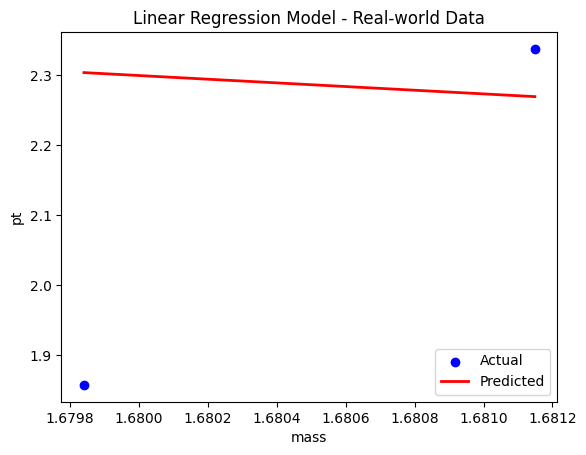

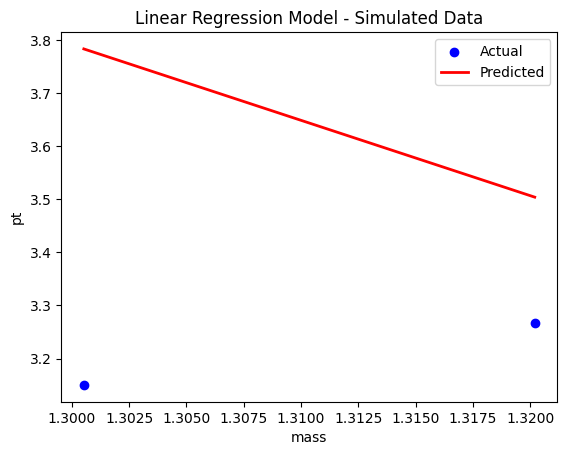

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Choose the feature and target columns
feature_column = 'mass'  # Choose any feature column from your list
target_column = 'pt'  # Choose any target column from your list

# Define the features (X) and target variable (y) for real-world data
X_real = AnalysisResults_reduced[[feature_column]]
y_real = AnalysisResults_reduced[target_column]

df_real = AnalysisResults_reduced
df_simulated = AnalysisResultsmc_reduced

# Define the features (X) and target variable (y) for simulated data
X_simulated = AnalysisResultsmc_reduced[[feature_column]]
y_simulated = AnalysisResultsmc_reduced[target_column]

# Split the real-world data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the simulated data into training and testing sets
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model for real-world data
model_real = LinearRegression()
model_real.fit(X_train_real, y_train_real)

# Initialize and fit the linear regression model for simulated data
model_simulated = LinearRegression()
model_simulated.fit(X_train_simulated, y_train_simulated)

# Predict the target variable for real-world test data
y_pred_real = model_real.predict(X_test_real)

# Predict the target variable for simulated test data
y_pred_simulated = model_simulated.predict(X_test_simulated)

# Calculate the mean squared error for real-world data
mse_real = mean_squared_error(y_test_real, y_pred_real)

# Calculate the mean squared error for simulated data
mse_simulated = mean_squared_error(y_test_simulated, y_pred_simulated)

# Print the mean squared error for both datasets
print("Mean Squared Error (Real-world data):", mse_real)
print("Mean Squared Error (Simulated data):", mse_simulated)

# Plot the linear regression model for real-world data
plt.scatter(X_test_real, y_test_real, color='blue', label='Actual')
plt.plot(X_test_real, y_pred_real, color='red', linewidth=2, label='Predicted')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.title('Linear Regression Model - Real-world Data')
plt.legend()
plt.show()

# Plot the linear regression model for simulated data
plt.scatter(X_test_simulated, y_test_simulated, color='blue', label='Actual')
plt.plot(X_test_simulated, y_pred_simulated, color='red', linewidth=2, label='Predicted')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.title('Linear Regression Model - Simulated Data')
plt.legend()
plt.show()


## Logistics Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target variable (y) for real data
X_real = df_real.drop(columns=['hasTOFhit'])
y_real = df_real['hasTOFhit']

# Split data into features (X) and target variable (y) for simulated data
X_simulated = df_simulated.drop(columns=['hasTOFhit'])
y_simulated = df_simulated['hasTOFhit']

# Split the real dataset into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the simulated dataset into training and testing sets
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Initialize logistic regression models
logreg_real = LogisticRegression()
logreg_simulated = LogisticRegression()

# Fit logistic regression models
logreg_real.fit(X_train_real, y_train_real)
logreg_simulated.fit(X_train_simulated, y_train_simulated)

# Make predictions on test data
y_pred_real = logreg_real.predict(X_test_real)
y_pred_simulated = logreg_simulated.predict(X_test_simulated)

# Evaluate model performance
accuracy_real = accuracy_score(y_test_real, y_pred_real)
accuracy_simulated = accuracy_score(y_test_simulated, y_pred_simulated)

print("Logistic Regression Model Accuracy - Real Data:", accuracy_real)
print("Logistic Regression Model Accuracy - Simulated Data:", accuracy_simulated)

# Print classification report
print("Classification Report - Real Data:")
print(classification_report(y_test_real, y_pred_real))

print("Classification Report - Simulated Data:")
print(classification_report(y_test_simulated, y_pred_simulated))



Logistic Regression Model Accuracy - Real Data: 0.5
Logistic Regression Model Accuracy - Simulated Data: 1.0
Classification Report - Real Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Classification Report - Simulated Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/home/dragon/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

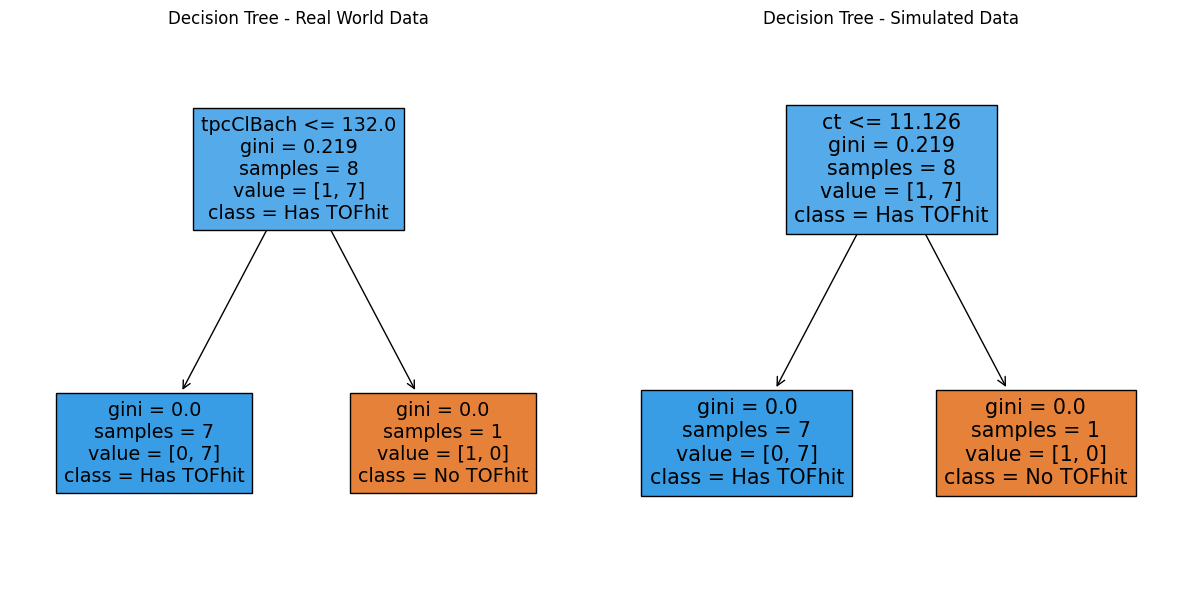

Decision Tree Model Accuracy - Real World Data: 0.5
Decision Tree Model Accuracy - Simulated Data: 1.0


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the real-world dataset
df_real = AnalysisResults_reduced

# Load the simulated dataset
df_simulated = AnalysisResultsmc_reduced

# Define the target variable
target_column = 'hasTOFhit'

# Extract features and target variable for real-world data
X_real = df_real.drop(columns=[target_column])
y_real = df_real[target_column]

# Extract features and target variable for simulated data
X_simulated = df_simulated.drop(columns=[target_column])
y_simulated = df_simulated[target_column]

# Split the data into training and testing sets for real-world data
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the data into training and testing sets for simulated data
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Initialize decision tree classifiers with a higher max_depth
dt_real = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_simulated = DecisionTreeClassifier(max_depth=10, random_state=42)

# Fit the decision tree models
dt_real.fit(X_train_real, y_train_real)
dt_simulated.fit(X_train_simulated, y_train_simulated)

# Plot the decision trees
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_tree(dt_real, feature_names=X_real.columns, class_names=['No TOFhit', 'Has TOFhit'], filled=True)
plt.title('Decision Tree - Real World Data')

plt.subplot(1, 2, 2)
plot_tree(dt_simulated, feature_names=X_simulated.columns, class_names=['No TOFhit', 'Has TOFhit'], filled=True)
plt.title('Decision Tree - Simulated Data')

plt.tight_layout()
plt.show()

# Evaluate model accuracy
accuracy_real = dt_real.score(X_test_real, y_test_real)
accuracy_simulated = dt_simulated.score(X_test_simulated, y_test_simulated)

print("Decision Tree Model Accuracy - Real World Data:", accuracy_real)
print("Decision Tree Model Accuracy - Simulated Data:", accuracy_simulated)


In [26]:
# Get feature names from the DataFrame columns
feature_names_real = X_real.columns
feature_names_simulated = X_simulated.columns

# Print model coefficients with feature names for real-world data
print("\nModel Coefficients - Real World Data:")
for feature, coef in zip(feature_names_real, logreg_real.coef_[0]):
    print(f"{feature}: {coef}")

# Print model coefficients with feature names for simulated data
print("\nModel Coefficients - Simulated Data:")
for feature, coef in zip(feature_names_simulated, logreg_simulated.coef_[0]):
    print(f"{feature}: {coef}")



Model Coefficients - Real World Data:
pt: 0.01930755737825803
eta: 0.011375023710765247
mass: -8.237091857221337e-05
ct: -0.005210531819280046
radius: 0.008420052027001603
radiusV0: 0.21822952758320513
dcaBachPV: -0.003317606640020243
dcaV0PV: 0.001994646424656076
dcaV0piPV: 0.015488790843760453
dcaV0prPV: 0.014275563131128675
dcaV0tracks: -0.001031467166844214
dcaBachV0: 0.006037175355566394
cosPA: 1.069982169815282e-05
cosPAV0: 3.551979743927022e-05
V0invMassDelta: 1.5553149158071065e-05
tpcNsigmaBach: 0.04021787699886853
tpcNsigmaV0Pr: 0.007011213703560815
tpcNsigmaV0Pi: -0.0020263486958457685
competingMass: 0.0015729534391356425
bachBarCosPA: -2.9480117440262805e-07
tpcClBach: -0.03673383766156497
tpcClV0Pr: -0.08977821606284819
tpcClV0Pi: -0.20042297867207312
centrality: 0.0287067141845512
matter: -0.0004861822695033114
hasITSrefit: -0.010547319171014901
isOmega: -2.9483065746899193e-07
index: 4.280587082114156e-06

Model Coefficients - Simulated Data:
pt: 0.00991189506243853
eta

## 3. Descision tree

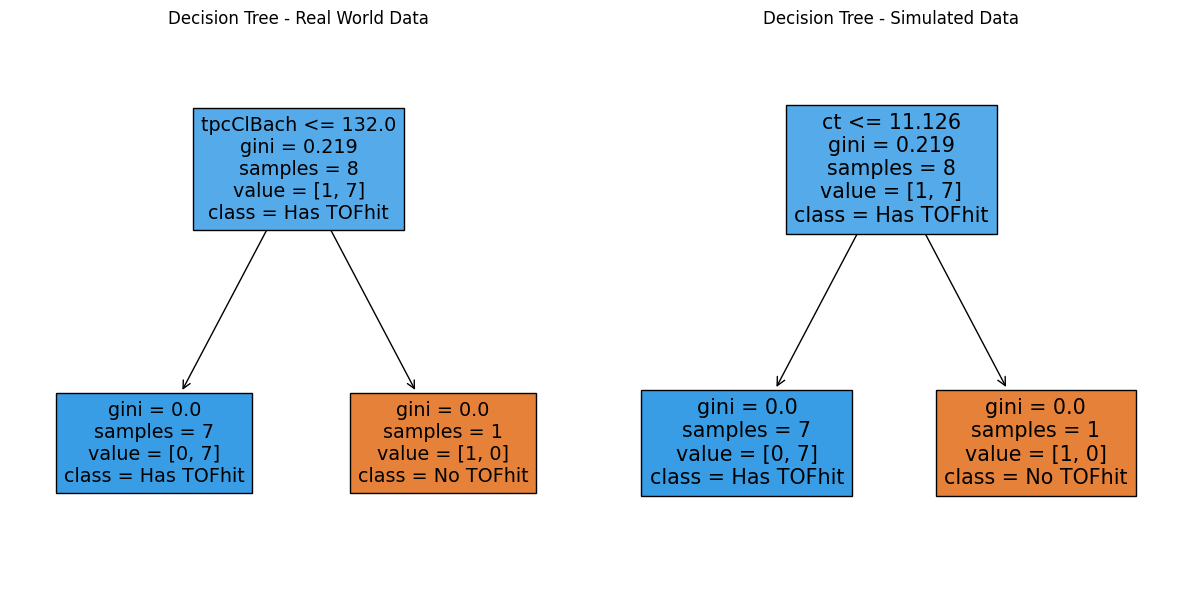

Decision Tree Model Accuracy - Real World Data: 0.5
Decision Tree Model Accuracy - Simulated Data: 1.0


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the real-world dataset
df_real = AnalysisResults_reduced

# Load the simulated dataset
df_simulated = AnalysisResultsmc_reduced

# Define the target variable
target_column = 'hasTOFhit'

# Extract features and target variable for real-world data
X_real = df_real.drop(columns=[target_column])
y_real = df_real[target_column]

# Extract features and target variable for simulated data
X_simulated = df_simulated.drop(columns=[target_column])
y_simulated = df_simulated[target_column]

# Split the data into training and testing sets for real-world data
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the data into training and testing sets for simulated data
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Initialize decision tree classifiers with a higher max_depth
dt_real = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_simulated = DecisionTreeClassifier(max_depth=10, random_state=42)

# Fit the decision tree models
dt_real.fit(X_train_real, y_train_real)
dt_simulated.fit(X_train_simulated, y_train_simulated)

# Plot the decision trees
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_tree(dt_real, feature_names=X_real.columns, class_names=['No TOFhit', 'Has TOFhit'], filled=True)
plt.title('Decision Tree - Real World Data')

plt.subplot(1, 2, 2)
plot_tree(dt_simulated, feature_names=X_simulated.columns, class_names=['No TOFhit', 'Has TOFhit'], filled=True)
plt.title('Decision Tree - Simulated Data')

plt.tight_layout()
plt.show()

# Evaluate model accuracy
accuracy_real = dt_real.score(X_test_real, y_test_real)
accuracy_simulated = dt_simulated.score(X_test_simulated, y_test_simulated)

print("Decision Tree Model Accuracy - Real World Data:", accuracy_real)
print("Decision Tree Model Accuracy - Simulated Data:", accuracy_simulated)


## Random Forrest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data (already loaded as df_real and df_simulated)

# Define the target variable
target_column = 'hasTOFhit'

# Extract features and target variable for real-world data
X_real = df_real.drop(columns=[target_column])
y_real = df_real[target_column]

# Extract features and target variable for simulated data
X_simulated = df_simulated.drop(columns=[target_column])
y_simulated = df_simulated[target_column]

# Split the data into training and testing sets for real-world data
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the data into training and testing sets for simulated data
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Initialize Random Forest classifiers
rf_real = RandomForestClassifier(random_state=42)
rf_simulated = RandomForestClassifier(random_state=42)

# Fit the Random Forest models
rf_real.fit(X_train_real, y_train_real)
rf_simulated.fit(X_train_simulated, y_train_simulated)

# Make predictions
y_pred_real = rf_real.predict(X_test_real)
y_pred_simulated = rf_simulated.predict(X_test_simulated)

# Evaluate model accuracy
accuracy_real = accuracy_score(y_test_real, y_pred_real)
accuracy_simulated = accuracy_score(y_test_simulated, y_pred_simulated)

print("Random Forest Model Accuracy - Real World Data:", accuracy_real)
print("Random Forest Model Accuracy - Simulated Data:", accuracy_simulated)




Random Forest Model Accuracy - Real World Data: 0.5
Random Forest Model Accuracy - Simulated Data: 0.5


/home/dragon/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


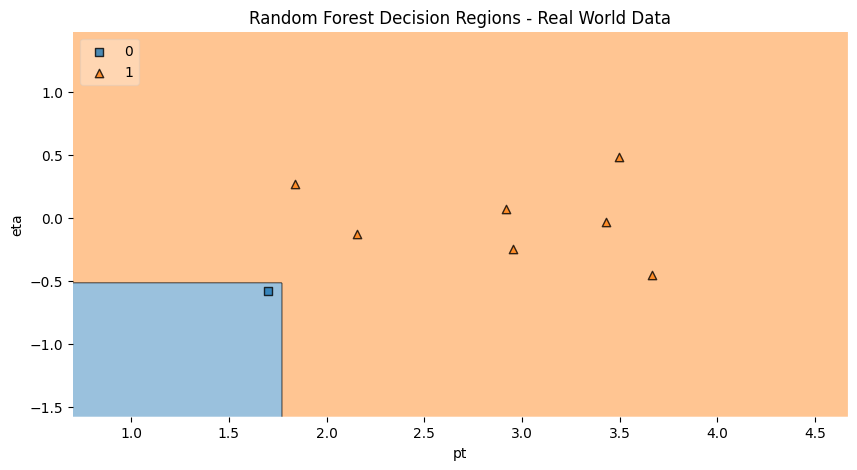

In [29]:
from mlxtend.plotting import plot_decision_regions

# Select the features for visualization
feature1 = 'pt'
feature2 = 'eta'

# Check if the selected features are present in the dataset
if feature1 in X_train_real.columns and feature2 in X_train_real.columns:
    # Select only the necessary features for visualization from the real-world data
    X_train_real_selected = X_train_real[[feature1, feature2]]
    
    # Fit the Random Forest model using the selected features
    rf_real_selected = RandomForestClassifier(random_state=42)
    rf_real_selected.fit(X_train_real_selected, y_train_real)
    
    # Plot decision regions for real-world data
    plt.figure(figsize=(10, 5))
    plot_decision_regions(X_train_real_selected.values, y_train_real.values, clf=rf_real_selected, legend=2)
    plt.title('Random Forest Decision Regions - Real World Data')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()
else:
    print("Selected features are not present in the dataset.")


## GRADIENT BOOSTING 

Accuracy of GBM on Real World dataset: 0.5000


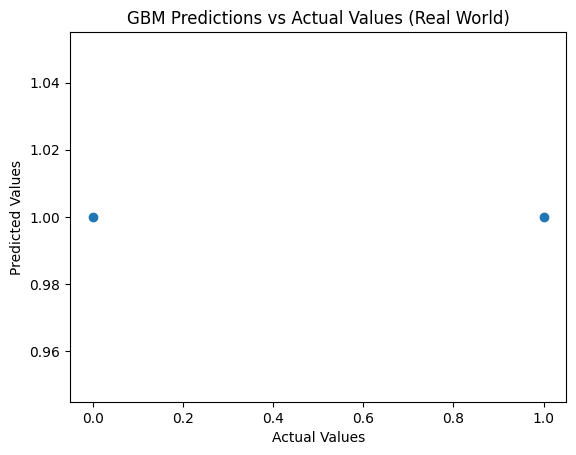

Classification Report for Real World dataset:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy of GBM on Simulated dataset: 0.5000


/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


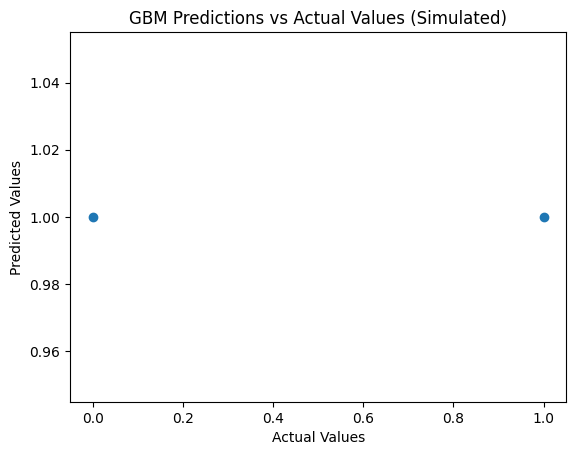

Classification Report for Simulated dataset:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to train, test, and plot GBM for a given dataset
def train_test_plot_gbm(X_train, X_test, y_train, y_test, dataset_name):
    # Initialize Gradient Boosting Classifier
    gbm = GradientBoostingClassifier(random_state=42)
    
    # Train the model
    gbm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = gbm.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of GBM on {dataset_name} dataset: {accuracy:.4f}")
    
    # Plot predicted vs. actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f"GBM Predictions vs Actual Values ({dataset_name})")
    plt.show()
    
    # Display model summary
    print(f"Classification Report for {dataset_name} dataset:\n")
    print(classification_report(y_test, y_pred))

# Split the real dataset into features and target
X_real = df_real.drop(columns=[target_column])
y_real = df_real[target_column]

# Split the simulated dataset into features and target
X_simulated = df_simulated.drop(columns=[target_column])
y_simulated = df_simulated[target_column]

# Split the real dataset into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the simulated dataset into training and testing sets
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Train, test, and plot GBM for the real dataset
train_test_plot_gbm(X_train_real, X_test_real, y_train_real, y_test_real, "Real World")

# Train, test, and plot GBM for the simulated dataset
train_test_plot_gbm(X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated, "Simulated")


## SUPPORT VECTOR MACHINE

Accuracy of SVM on Real World dataset: 0.5000


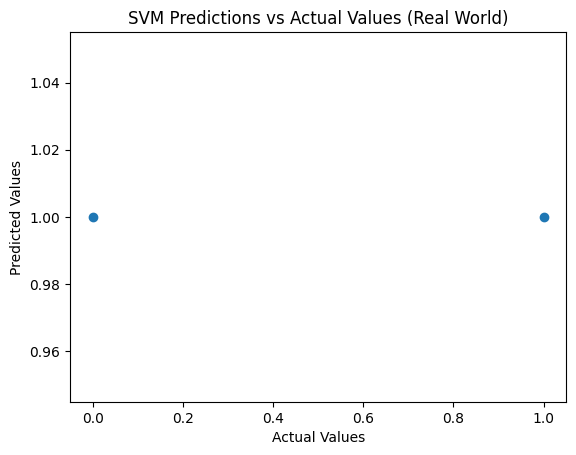

Classification Report for Real World dataset:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy of SVM on Simulated dataset: 0.5000


/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


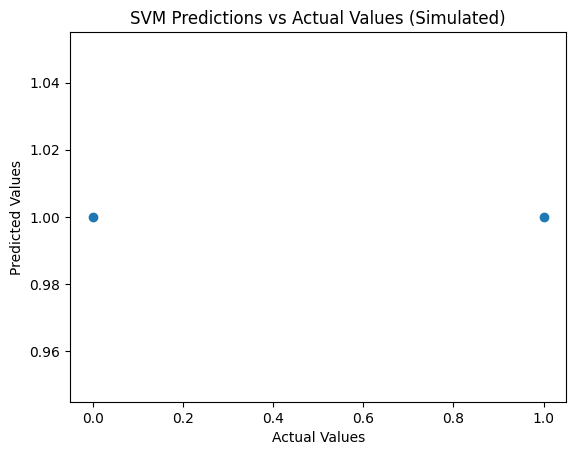

Classification Report for Simulated dataset:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to train, test, and plot SVM for a given dataset
def train_test_plot_svm(X_train, X_test, y_train, y_test, dataset_name):
    # Initialize Support Vector Classifier
    svm = SVC(kernel='linear', random_state=42)
    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of SVM on {dataset_name} dataset: {accuracy:.4f}")
    
    # Plot predicted vs. actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f"SVM Predictions vs Actual Values ({dataset_name})")
    plt.show()
    
    # Display model summary
    print(f"Classification Report for {dataset_name} dataset:\n")
    print(classification_report(y_test, y_pred))

# Split the real dataset into features and target
X_real = df_real.drop(columns=[target_column])
y_real = df_real[target_column]

# Split the simulated dataset into features and target
X_simulated = df_simulated.drop(columns=[target_column])
y_simulated = df_simulated[target_column]

# Split the real dataset into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the simulated dataset into training and testing sets
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Train, test, and plot SVM for the real dataset
train_test_plot_svm(X_train_real, X_test_real, y_train_real, y_test_real, "Real World")

# Train, test, and plot SVM for the simulated dataset
train_test_plot_svm(X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated, "Simulated")


## K-Nearest Neighbours (KNN)

Accuracy of KNN on Real World dataset: 0.5000


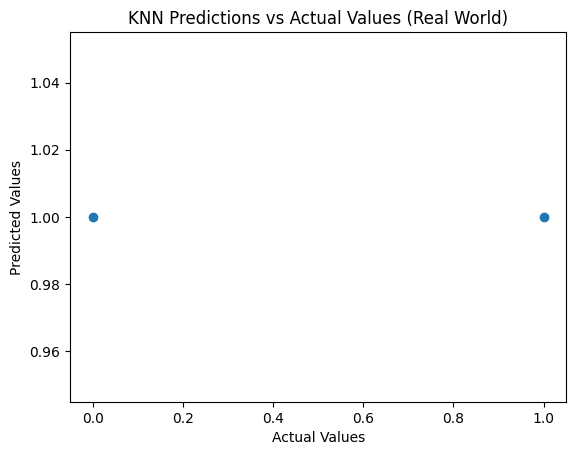

Classification Report for Real World dataset:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2

Accuracy of KNN on Simulated dataset: 0.5000


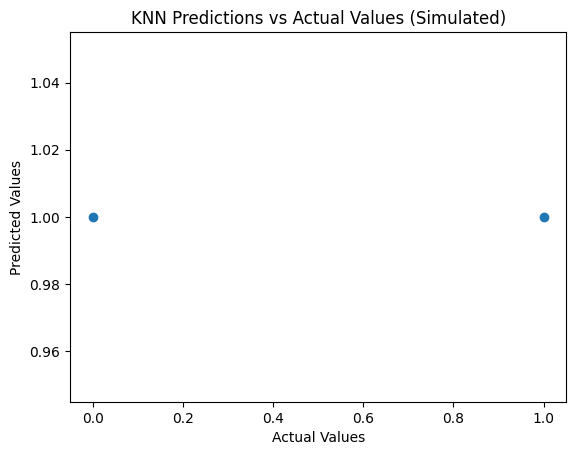

Classification Report for Simulated dataset:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



In [32]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Function to train, test, and plot KNN for a given dataset
def train_test_plot_knn(X_train, X_test, y_train, y_test, dataset_name):
    # Initialize KNN Classifier
    knn = KNeighborsClassifier()
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of KNN on {dataset_name} dataset: {accuracy:.4f}")
    
    # Plot predicted vs. actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f"KNN Predictions vs Actual Values ({dataset_name})")
    plt.show()
    
    # Display model summary
    print(f"Classification Report for {dataset_name} dataset:\n")
    print(classification_report(y_test, y_pred, zero_division=1))  # Set zero_division parameter to 1

# Split the real dataset into features and target
X_real = df_real.drop(columns=[target_column])
y_real = df_real[target_column]

# Split the simulated dataset into features and target
X_simulated = df_simulated.drop(columns=[target_column])
y_simulated = df_simulated[target_column]

# Split the real dataset into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the simulated dataset into training and testing sets
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Train, test, and plot KNN for the real dataset
train_test_plot_knn(X_train_real, X_test_real, y_train_real, y_test_real, "Real World")

# Train, test, and plot KNN for the simulated dataset
train_test_plot_knn(X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated, "Simulated")


## Naive BAyes 

Naive Bayes Model Accuracy (Real World): 0.5


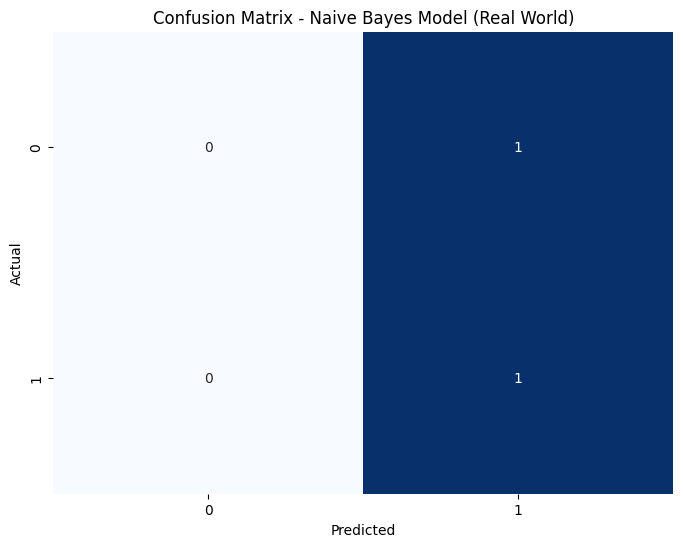

Classification Report (Real World):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Gaussian Naive Bayes Model Summary (Real World):
GaussianNB()

Naive Bayes Model Accuracy (Simulated Data): 0.5


/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


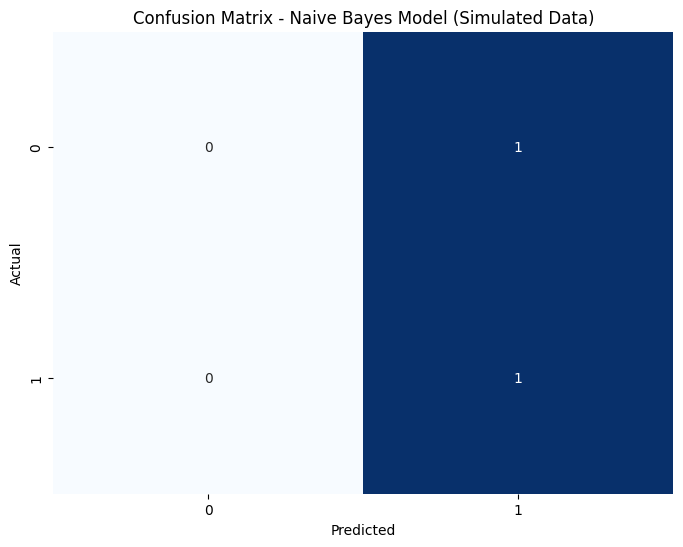

Classification Report (Simulated Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Gaussian Naive Bayes Model Summary (Simulated Data):
GaussianNB()


/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dragon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Naive Bayes model for real-world data
nb_model_real = GaussianNB()
nb_model_real.fit(X_train_real, y_train_real)

# Make predictions for real-world data
y_pred_nb_real = nb_model_real.predict(X_test_real)

# Calculate accuracy for real-world data
accuracy_nb_real = accuracy_score(y_test_real, y_pred_nb_real)
print("Naive Bayes Model Accuracy (Real World):", accuracy_nb_real)

# Generate confusion matrix for real-world data
cm_real = confusion_matrix(y_test_real, y_pred_nb_real)

# Plot confusion matrix for real-world data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_real, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Model (Real World)")
plt.show()

# Generate classification report for real-world data
print("Classification Report (Real World):")
print(classification_report(y_test_real, y_pred_nb_real))

# Display model summary for real-world data
print("Gaussian Naive Bayes Model Summary (Real World):")
print(nb_model_real)

# Create and train the Naive Bayes model for simulated data
nb_model_simulated = GaussianNB()
nb_model_simulated.fit(X_train_simulated, y_train_simulated)

# Make predictions for simulated data
y_pred_nb_simulated = nb_model_simulated.predict(X_test_simulated)

# Calculate accuracy for simulated data
accuracy_nb_simulated = accuracy_score(y_test_simulated, y_pred_nb_simulated)
print("\nNaive Bayes Model Accuracy (Simulated Data):", accuracy_nb_simulated)

# Generate confusion matrix for simulated data
cm_simulated = confusion_matrix(y_test_simulated, y_pred_nb_simulated)

# Plot confusion matrix for simulated data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_simulated, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Model (Simulated Data)")
plt.show()

# Generate classification report for simulated data
print("Classification Report (Simulated Data):")
print(classification_report(y_test_simulated, y_pred_nb_simulated))

# Display model summary for simulated data
print("Gaussian Naive Bayes Model Summary (Simulated Data):")
print(nb_model_simulated)


##  Principal Component Analysis (PCA)

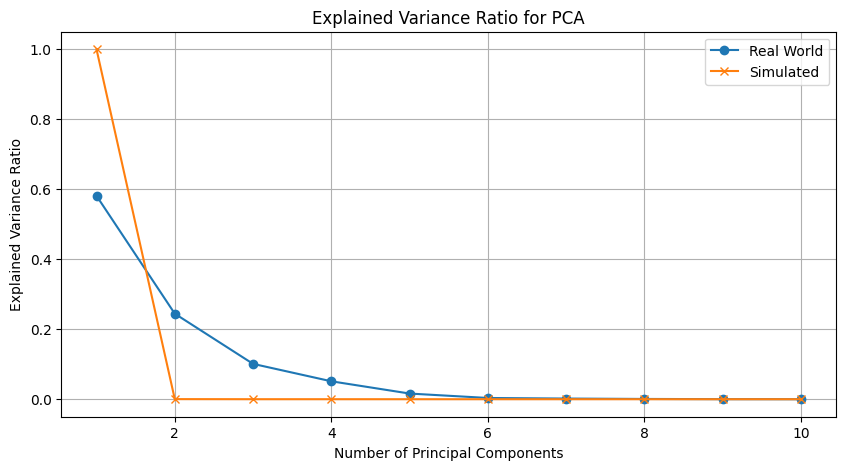

PCA Model Summary - Real World:
PCA()

PCA Model Summary - Simulated:
PCA()

Principal Components - Real World:
[[-5.73719510e-04 -1.24666174e-03  6.80806506e-05 -4.57563524e-02
  -8.34362152e-02 -3.99414116e-02  1.25903613e-04 -6.99542471e-03
   4.86048896e-03  1.00628800e-02 -6.18796768e-03  9.74825878e-04
   3.16865455e-05 -7.30410544e-06  3.07211153e-05 -1.97257924e-02
  -3.42684876e-03 -3.16297739e-02 -6.03754341e-04 -1.71953633e-08
   4.07892736e-01  6.29688295e-01  6.47060737e-01  7.81845826e-02
   6.95722197e-03 -3.86901410e-04  0.00000000e+00  3.75911848e-06]
 [-1.06300516e-02  4.64205351e-03  5.22016135e-04 -7.44640955e-02
  -1.41455106e-01 -1.98789154e-01  6.89230230e-03 -2.10199451e-02
   9.63171325e-03 -3.19131454e-03  9.44818299e-03  5.10461411e-03
  -1.28691448e-04  1.85175348e-05 -5.03553207e-05  1.98728169e-02
   1.34492052e-02 -3.47035266e-02  1.28462295e-03  5.74926723e-08
   4.40493344e-01 -7.52419004e-01  4.13416363e-01  3.45696817e-02
  -1.82033867e-03 -4.89482847

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA models
pca_real = PCA()
pca_simulated = PCA()

# Fit PCA models to the data
pca_real.fit(X_real)
pca_simulated.fit(X_simulated)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_real.explained_variance_ratio_) + 1), pca_real.explained_variance_ratio_, marker='o', label='Real World')
plt.plot(range(1, len(pca_simulated.explained_variance_ratio_) + 1), pca_simulated.explained_variance_ratio_, marker='x', label='Simulated')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA')
plt.legend()
plt.grid(True)
plt.show()

# Print model summaries
print("PCA Model Summary - Real World:")
print(pca_real)

print("\nPCA Model Summary - Simulated:")
print(pca_simulated)

# Print principal components (coefficients)
print("\nPrincipal Components - Real World:")
print(pca_real.components_)

print("\nPrincipal Components - Simulated:")
print(pca_simulated.components_)


## Partial Least Squares (PLS)

PLS Regression for Simulated Data:


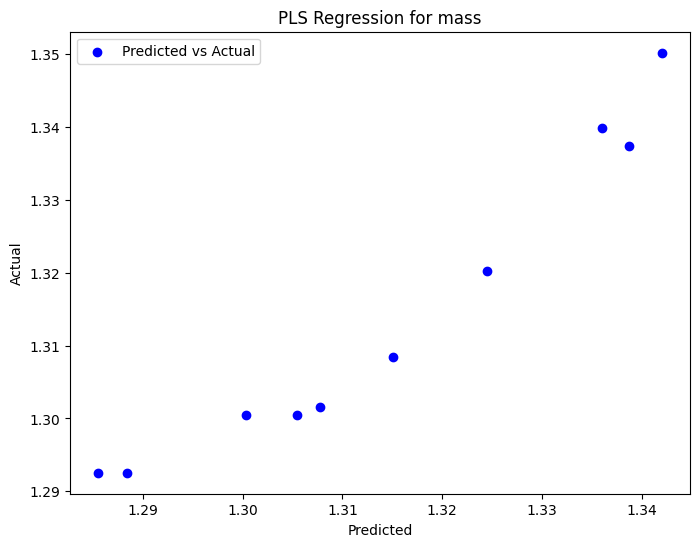


PLS Regression Coefficients and Model Summary for mass :
Coefficients:
 [[-1.59628803e-03  1.13300716e-03 -1.08434789e-05 -3.58478132e-04
   1.00916022e-03  1.37322575e-03  4.82920132e-04 -1.38552228e-03
  -2.92126795e-04  4.69995271e-04 -2.01788835e-03 -9.96544257e-04
  -4.50663334e-04 -2.39695849e-03 -6.49452655e-04  5.96604393e-04
  -8.71129851e-04 -2.30033045e-04  0.00000000e+00 -1.66834582e-03
   2.52004603e-03  9.68336647e-04 -3.33143947e-03 -1.63886664e-04
  -1.35527424e-03 -2.19694233e-03 -1.80445924e-03  2.67252744e-03
   7.69796790e-04 -1.60333295e-03  2.17528397e-03 -6.86172886e-04
   2.94746766e-03  0.00000000e+00  4.85831232e-05]]

Model Summary:
 {'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

PLS Regression for Real World Data:


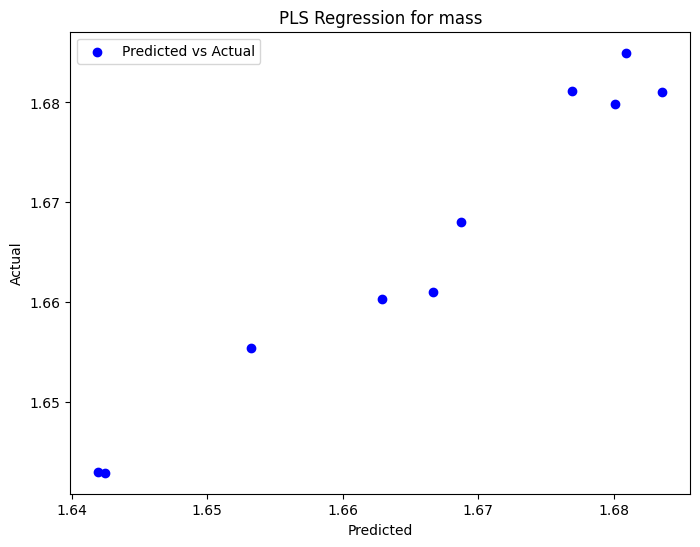


PLS Regression Coefficients and Model Summary for mass :
Coefficients:
 [[-2.66349163e-03 -8.11119025e-04 -1.47256728e-03 -2.02043989e-03
  -1.92002008e-05  1.95665869e-03 -6.18122077e-04  1.50205860e-03
   1.16713052e-04  5.81388295e-04  2.24076742e-03 -3.61582629e-03
   1.43162854e-04 -2.03593856e-03  9.40602390e-04 -2.41540315e-03
   6.72817663e-04  1.82589974e-03  1.24549090e-03  1.16932293e-03
  -1.56529136e-03  1.56609385e-03 -4.16419709e-04  1.28098392e-03
  -1.54406691e-03  5.83612345e-04  0.00000000e+00  1.44877078e-04]]

Model Summary:
 {'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}


In [35]:
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import pandas as pd

# Function to perform PLS regression and plot the results
def perform_pls_regression(df, target_column):
    # Extract features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Create and fit PLS model
    pls = PLSRegression(n_components=2)
    pls.fit(X, y)

    # Plot the model
    plt.figure(figsize=(8, 6))
    plt.scatter(pls.predict(X), y, color='blue', label='Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('PLS Regression for ' + target_column)
    plt.legend()
    plt.show()

    # Coefficients and model summary
    print("\nPLS Regression Coefficients and Model Summary for", target_column, ":")
    print("Coefficients:\n", pls.coef_)
    print("\nModel Summary:\n", pls.get_params())

# Assuming df_simulated and df_real are your dataframes
target_column = 'mass'

# Perform PLS regression for simulated data
print("PLS Regression for Simulated Data:")
perform_pls_regression(df_simulated, target_column)

# Perform PLS regression for real-world data
print("\nPLS Regression for Real World Data:")
perform_pls_regression(df_real, target_column)
